# First Look at the Data
With the metadata collected and cleaned. It is now time to take and to get a _feel_ of its use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [2]:
data_file_path   = "./data/"
combined_artists = pd.read_csv("".join([data_file_path,"combined_artists/combined_artists.csv"]), index_col = 0)

In [3]:
# convert the style column into lists
combined_artists["style"] = combined_artists["style"].apply(eval)

## Helper Function

In [4]:
# Function for positioning text labels onto a chart
def plot_label(x, y, value, ax):

    # concatinate the X Y locations with the label value
    a = pd.concat({'x': x, 'y': y, 'val': value}, axis = 1)
    
    # write text labels
    for i, point in a.iterrows():
        # only write the label when the value is great 
        # than zero to make the plot easier to read
        if point['val'] > 0 : 
            ax.text(point['x'], point['y'], "{}%".format(str(point['val'])), color = 'darkgrey')

## Artists Periods of Productivity
When did each artist produce their work? Where ther periods when they were more productive?

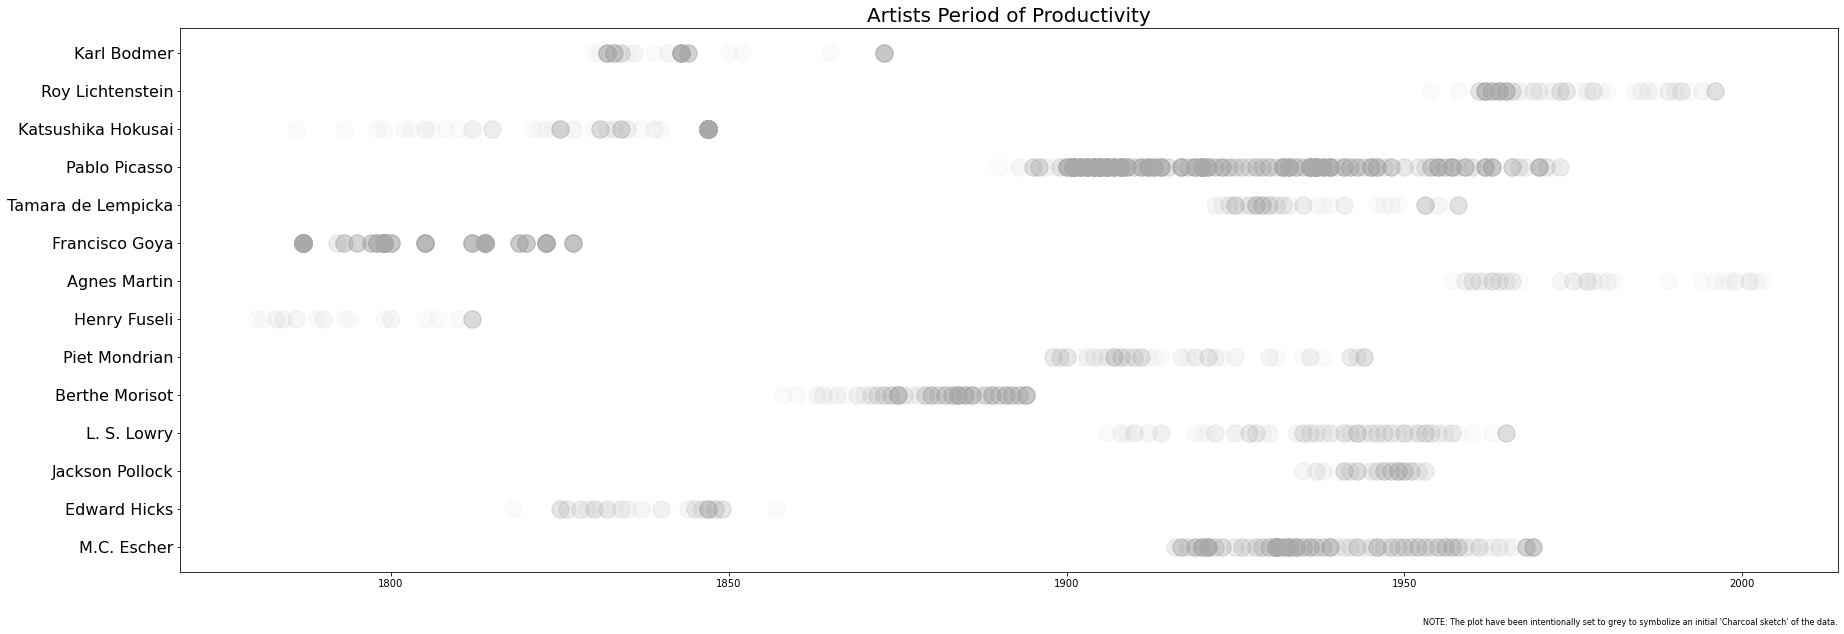

In [5]:
# create the figure
plt.figure(figsize  = (29.7,10))

# create a scatter bar plot
plt.scatter(combined_artists["year"], combined_artists["artist"], s = 300, alpha = 0.05, c = "darkgrey")
plt.yticks(fontsize = 16)
plt.title("Artists Period of Productivity", fontsize = 20)

# add small note to bottom of the plot
plt.figtext(0.9, 0.051, "NOTE: The plot have been intentionally set to grey to symbolize an initial 'Charcoal sketch' of the data.", wrap=True, horizontalalignment='right', fontsize=8)

# show the plot
plt.show()

## The Distribution of Genres within our Dataset

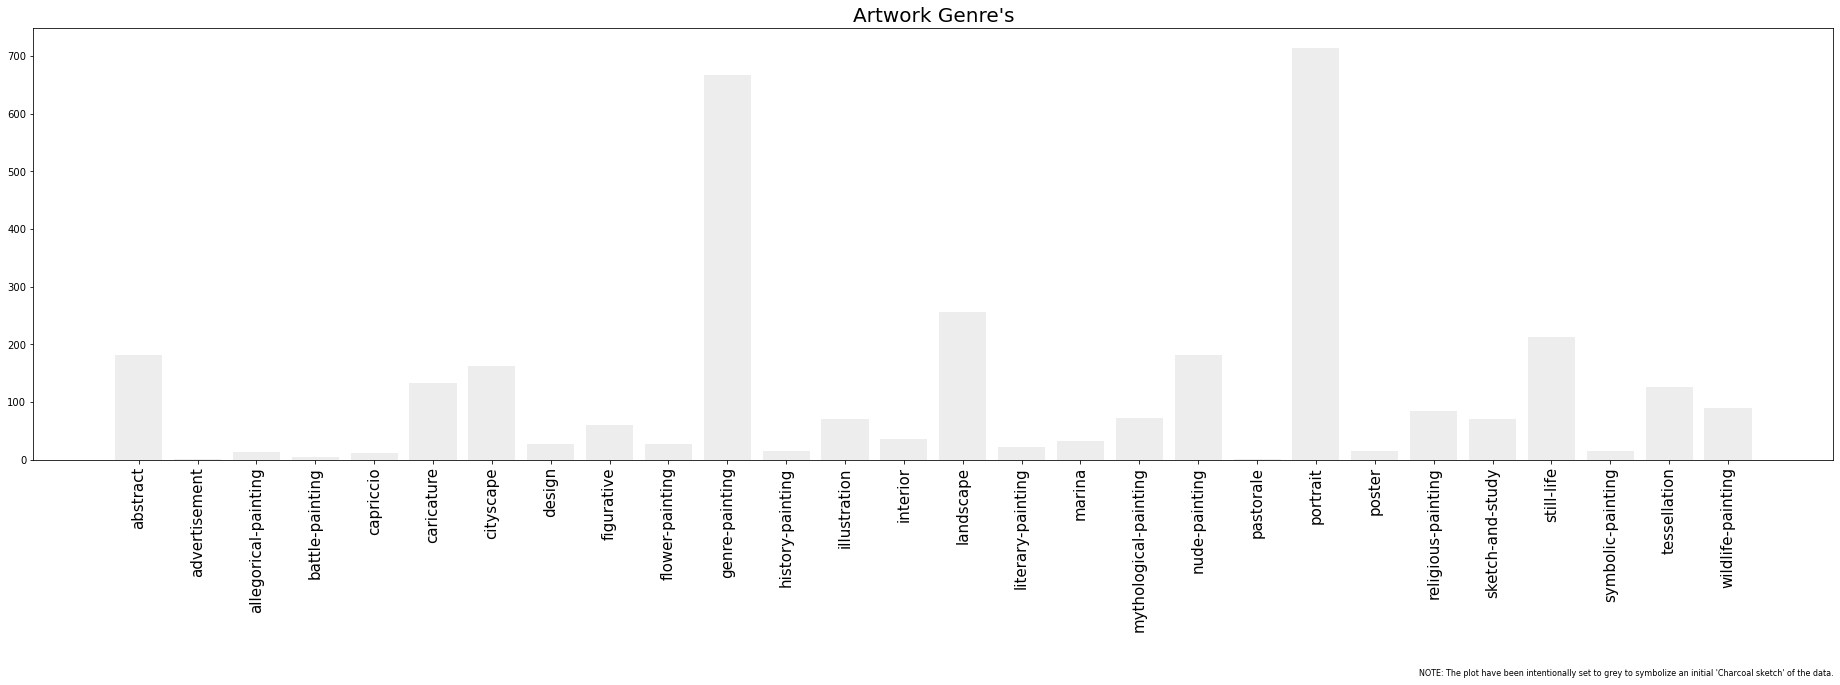

In [6]:
# create the figure
fig = plt.figure(figsize = (25, 6))
ax  = fig.add_axes([0,0,1,1])

# create a simple bar plot
dat = combined_artists.groupby(["genre"]).count().reset_index()
ax.bar(dat["genre"], dat["artist"], alpha = 0.2, color = "darkgrey")
plt.xticks(rotation = 90,    fontsize = 15)
plt.title("Artwork Genre's", fontsize = 20)

# add small note to bottom of the plot
plt.figtext(1, -0.5, "NOTE: The plot have been intentionally set to grey to symbolize an initial 'Charcoal sketch' of the data.", wrap=True, horizontalalignment='right', fontsize=8)

# show the plot
plt.show()

__NOTE:__ The __genre-painting__, being so generic, could really be considered as _Unclassified_. We see that __portrait__ dominates the genres. Although portraits are very common, I may have introduced a bias with the small group of selected Artists. For this project it is only possible to sellect a small number of Artists due the the processing and time contraints. If these were not a consideration and the entire set of Artists and their bodies of work could be processed. Then we might get a slightly more balanced distribsion of Genres.  

## The Distribution of Styles within our Dataset

In [7]:
# generate a unique list of all styles. an artwork may be listed as having more than one style
unique_styles = set(",".join(combined_artists["style"].apply(lambda x: ",".join([i for i in x])).unique()).split(","))

In [8]:
artistic_style_count = pd.DataFrame()

# loop through all of the artistic styles
for artistic_style in unique_styles:

    # count the occurances of the sytle within all of the style lists of all of the artworks
    style_count = pd.DataFrame( {"style" : [artistic_style], "count" : [len(combined_artists[combined_artists["style"].apply(lambda x: artistic_style in x)])]} )   
    
    # add the total for the style to the dataset
    artistic_style_count = artistic_style_count.append(style_count)
    
# reset the index    
artistic_style_count.reset_index(drop=True, inplace=True)

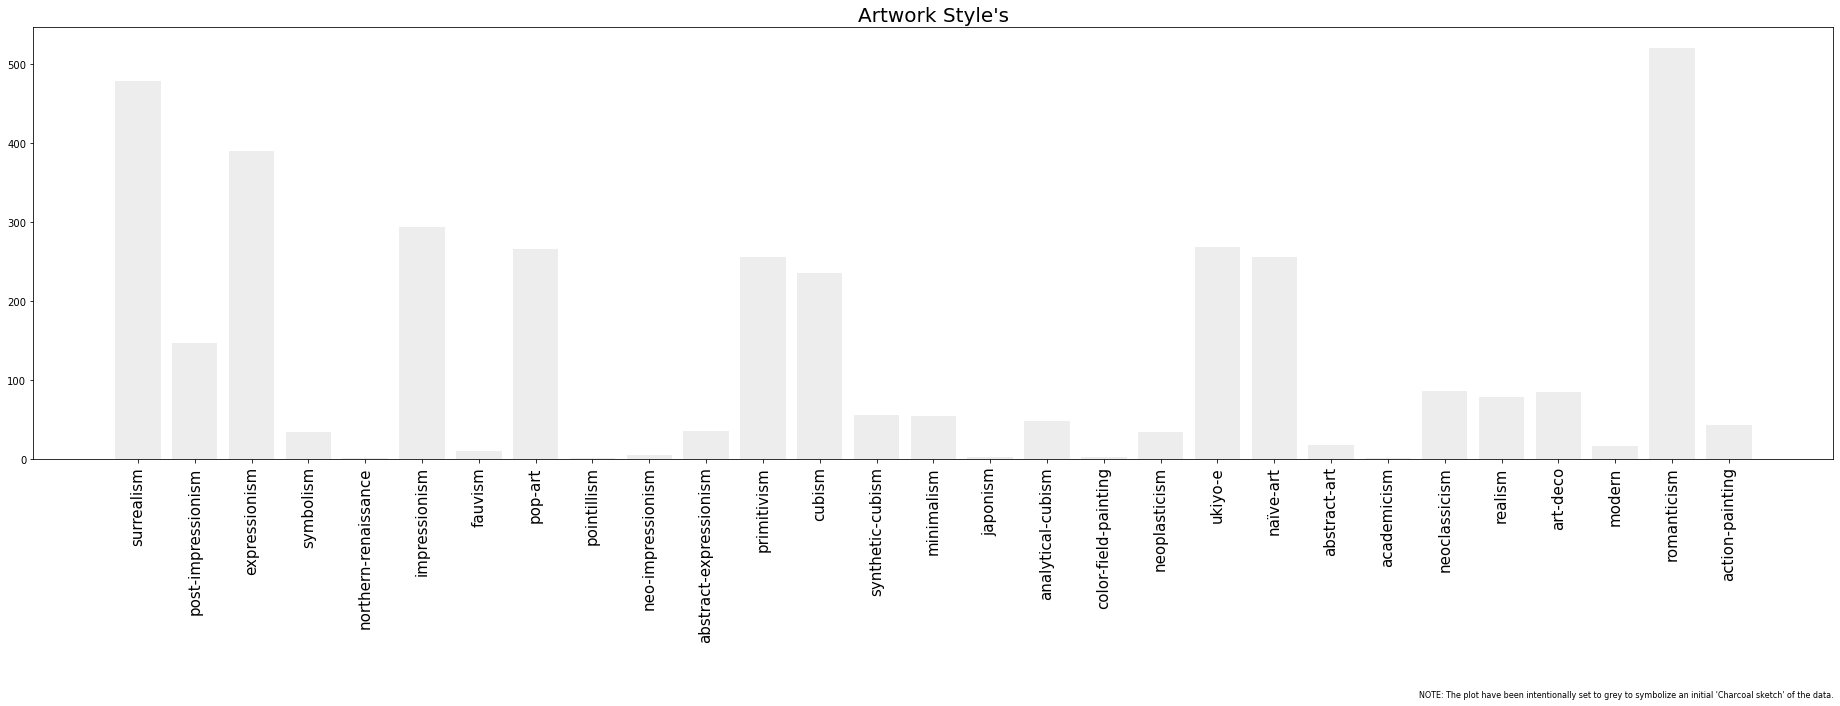

In [9]:
# create the figure
fig = plt.figure(figsize=(25, 6))
ax  = fig.add_axes([0,0,1,1])

# create a simple bar plot
x   = artistic_style_count["style"]
y   = artistic_style_count["count"]
ax.bar(x, y, alpha  = 0.2,   color    = "darkgrey")
plt.xticks(rotation = 90,    fontsize = 15)
plt.title("Artwork Style's", fontsize = 20)

# add small note to bottom of the plot
plt.figtext(1, -0.55, "NOTE: The plot have been intentionally set to grey to symbolize an initial 'Charcoal sketch' of the data.", wrap=True, horizontalalignment='right', fontsize=8)

# show the plot
plt.show()

## View Each Artist's Genre's
First we count the number of artworks that we have details of fro each of the Artists.

In [10]:
# count the number of artworks per artist
artist_total_artworks = pd.DataFrame(combined_artists.groupby(["artist"]).count()["title"]).rename(columns={"title" : "count_total"})
artist_total_artworks.reset_index(inplace = True)

# view that data
artist_total_artworks

,artist,count_total
0,Agnes Martin,57
1,Berthe Morisot,241
2,Edward Hicks,74
3,Francisco Goya,388
4,Henry Fuseli,28
5,Jackson Pollock,87
6,Karl Bodmer,104
7,Katsushika Hokusai,268
8,L. S. Lowry,135
9,M.C. Escher,468


Now we find the number of artworks by Genre for created by each Artist.

In [11]:
# count the number of artworks by genre for each artist
artist_genres = pd.DataFrame(combined_artists.groupby(["artist", "genre"]).count()["title"]).rename(columns={"title" : "count"})
artist_genres.reset_index(inplace = True)

# view that data
artist_genres

,artist,genre,count
0,Agnes Martin,abstract,57
1,Berthe Morisot,cityscape,3
2,Berthe Morisot,flower-painting,3
3,Berthe Morisot,genre-painting,122
4,Berthe Morisot,landscape,29
...,...,...,...
134,Tamara de Lempicka,landscape,1
135,Tamara de Lempicka,nude-painting,13
136,Tamara de Lempicka,portrait,66
137,Tamara de Lempicka,religious-painting,1


We can now put the together and caluclate the percentage of the works of each Artist are of a specific Genre type.

In [12]:
# add the total artworks as a coulmn to the number of 
# artworks by genre for each artist dataset
artist_genres = artist_genres.merge(artist_total_artworks)

# calculate the percentage of the artists artworks that
# are of the genre
artist_genres["percentage"] = ((100 / artist_genres["count_total"]) * artist_genres["count"]).round(2)

# view that data
artist_genres

,artist,genre,count,count_total,percentage
0,Agnes Martin,abstract,57,57,100.00
1,Berthe Morisot,cityscape,3,241,1.24
2,Berthe Morisot,flower-painting,3,241,1.24
3,Berthe Morisot,genre-painting,122,241,50.62
4,Berthe Morisot,landscape,29,241,12.03
...,...,...,...,...,...
134,Tamara de Lempicka,landscape,1,93,1.08
135,Tamara de Lempicka,nude-painting,13,93,13.98
136,Tamara de Lempicka,portrait,66,93,70.97
137,Tamara de Lempicka,religious-painting,1,93,1.08


## View the Percentage of Artist's Artworks of each Genre
We can now visualize the data. <br/>
__NOTE:__ the size of each dot indicates the amount of artworks and the number specifies the percentage of the Artist catalog, for the give Genre.

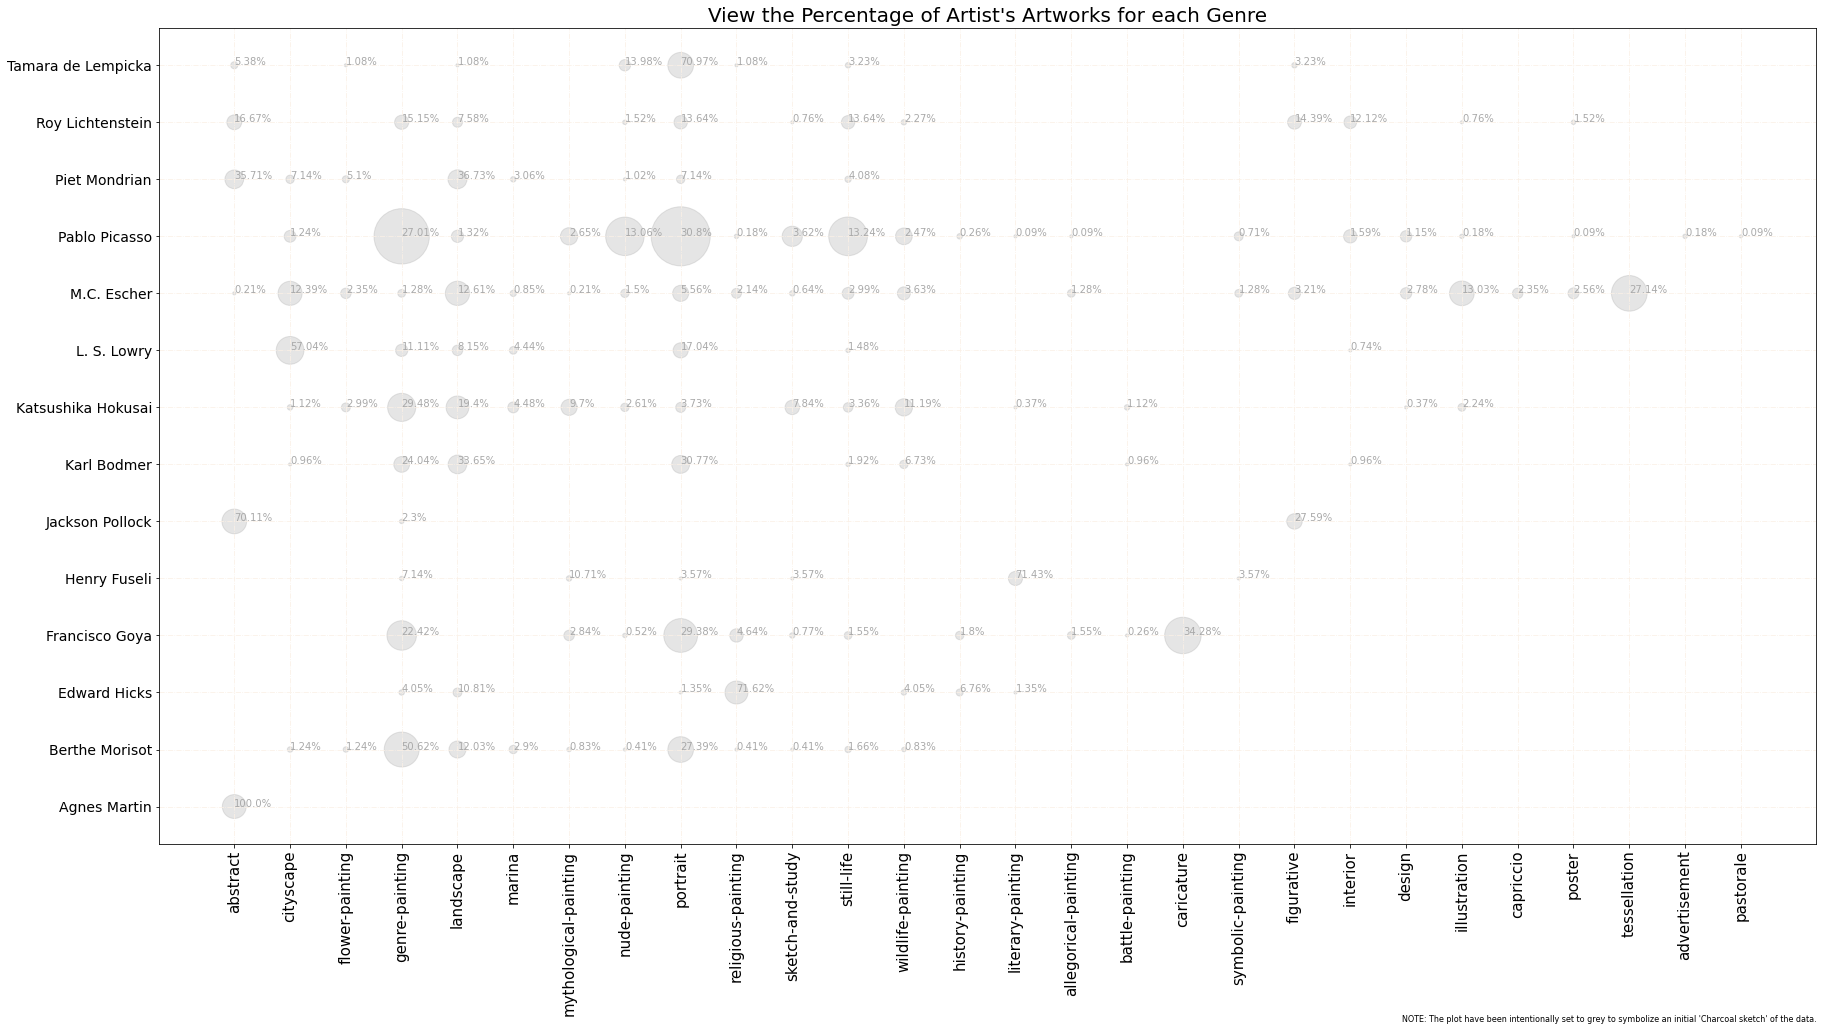

In [13]:
# create the figure
plt.figure(figsize  = (29.7,15))
ax = plt.axes()
ax.grid(True, linestyle = '-.' ,color = 'linen')

# create the scatter plot
plt.scatter(artist_genres["genre"], artist_genres["artist"], s = artist_genres["count"] * 10, alpha = 0.3, c = "darkgrey")
plt.yticks(fontsize = 14)
plt.xticks(rotation = 90, fontsize = 15)
plt.title("View the Percentage of Artist's Artworks for each Genre", fontsize = 20)

# call that labelling function           
plot_label(artist_genres["genre"], artist_genres["artist"], artist_genres["percentage"], ax)

# add small note to bottom of the plot
plt.figtext(0.9, -0.04, "NOTE: The plot have been intentionally set to grey to symbolize an initial 'Charcoal sketch' of the data.", wrap=True, horizontalalignment='right', fontsize=8)

# show the plot
plt.show()

__NOTE:__ From the plot above we are able to build a profile of the Genres of each Artists body of work. 

## View Each Artist's Style's
First we must extract the individual Sytyles fromt the list of Styles for each Artwork and associate it with the Artist.

In [14]:
# create the dataframe
artist_style = pd.DataFrame()

# loop through all values withing the combined_artists dataframes index
for artwork_id in combined_artists.index:

    try:
        # select the data row for the current index value
        row_data = combined_artists.iloc[artwork_id]

        # split the style column and loop throught each value (normally only one). when we
        # find multiple values we generate a row for each value
        for artwork_style in str(row_data["style"]).replace("[", "").replace("]", "").replace("''", "").replace("'", "").split(","):

            # create a dict containing just the artwork_id and the style_id
            row_data = {"artist" : row_data["artist"],
                        "style"   : artwork_style}

            # append the dict as a row to the artwork_style_table_data dataframe
            artist_style = artist_style.append(row_data, ignore_index = True)
    except:
        pass

Next we count the number of Artwork Styles per Artist. <br/>
__NOTE:__ an Artwork may have more than one Style associated with it.

In [15]:
# count the number of artworks per artist
artist_total_style = pd.DataFrame(artist_style.groupby(["artist"]).count()["style"]).rename(columns={"style" : "count_total"})
artist_total_style.reset_index(inplace = True)

# set up the count column
artist_style["count"] = 0

# count the number of artworks by style for each artist
artist_style = pd.DataFrame(artist_style.groupby(["artist", "style"]).count()["count"]).rename(columns={"count_total" : "count"})
artist_style.reset_index(inplace = True)

We now generate the percentage of Artworks of each Artist are of a particular Style.

In [16]:
# add the total artworks as a coulmn to the number of 
# artworks by genre for each artist dataset
artist_style = artist_style.merge(artist_total_style)

# calculate the percentage of the artists artworks that
# are of the genre
artist_style["percentage"] = ((100 / artist_style["count_total"]) * artist_style["count"]).round(2)

# view that data
artist_style

,artist,style,count,count_total,percentage
0,Agnes Martin,color-field-painting,3,57,5.26
1,Agnes Martin,minimalism,54,57,94.74
2,Berthe Morisot,impressionism,239,240,99.58
3,Berthe Morisot,realism,1,240,0.42
4,Edward Hicks,primitivism,73,146,50.00
...,...,...,...,...,...
67,Roy Lichtenstein,pop-art,98,127,77.17
68,Tamara de Lempicka,art-deco,83,93,89.25
69,Tamara de Lempicka,cubism,7,93,7.53
70,Tamara de Lempicka,post-impressionism,1,93,1.08


## View the Percentage of Artist's Artworks of each Style
We can now visualize the data. <br/>
__NOTE:__ the size of each dot indicates the amount of artworks and the number specifies the percentage of the Artist catalog, for the give Style.

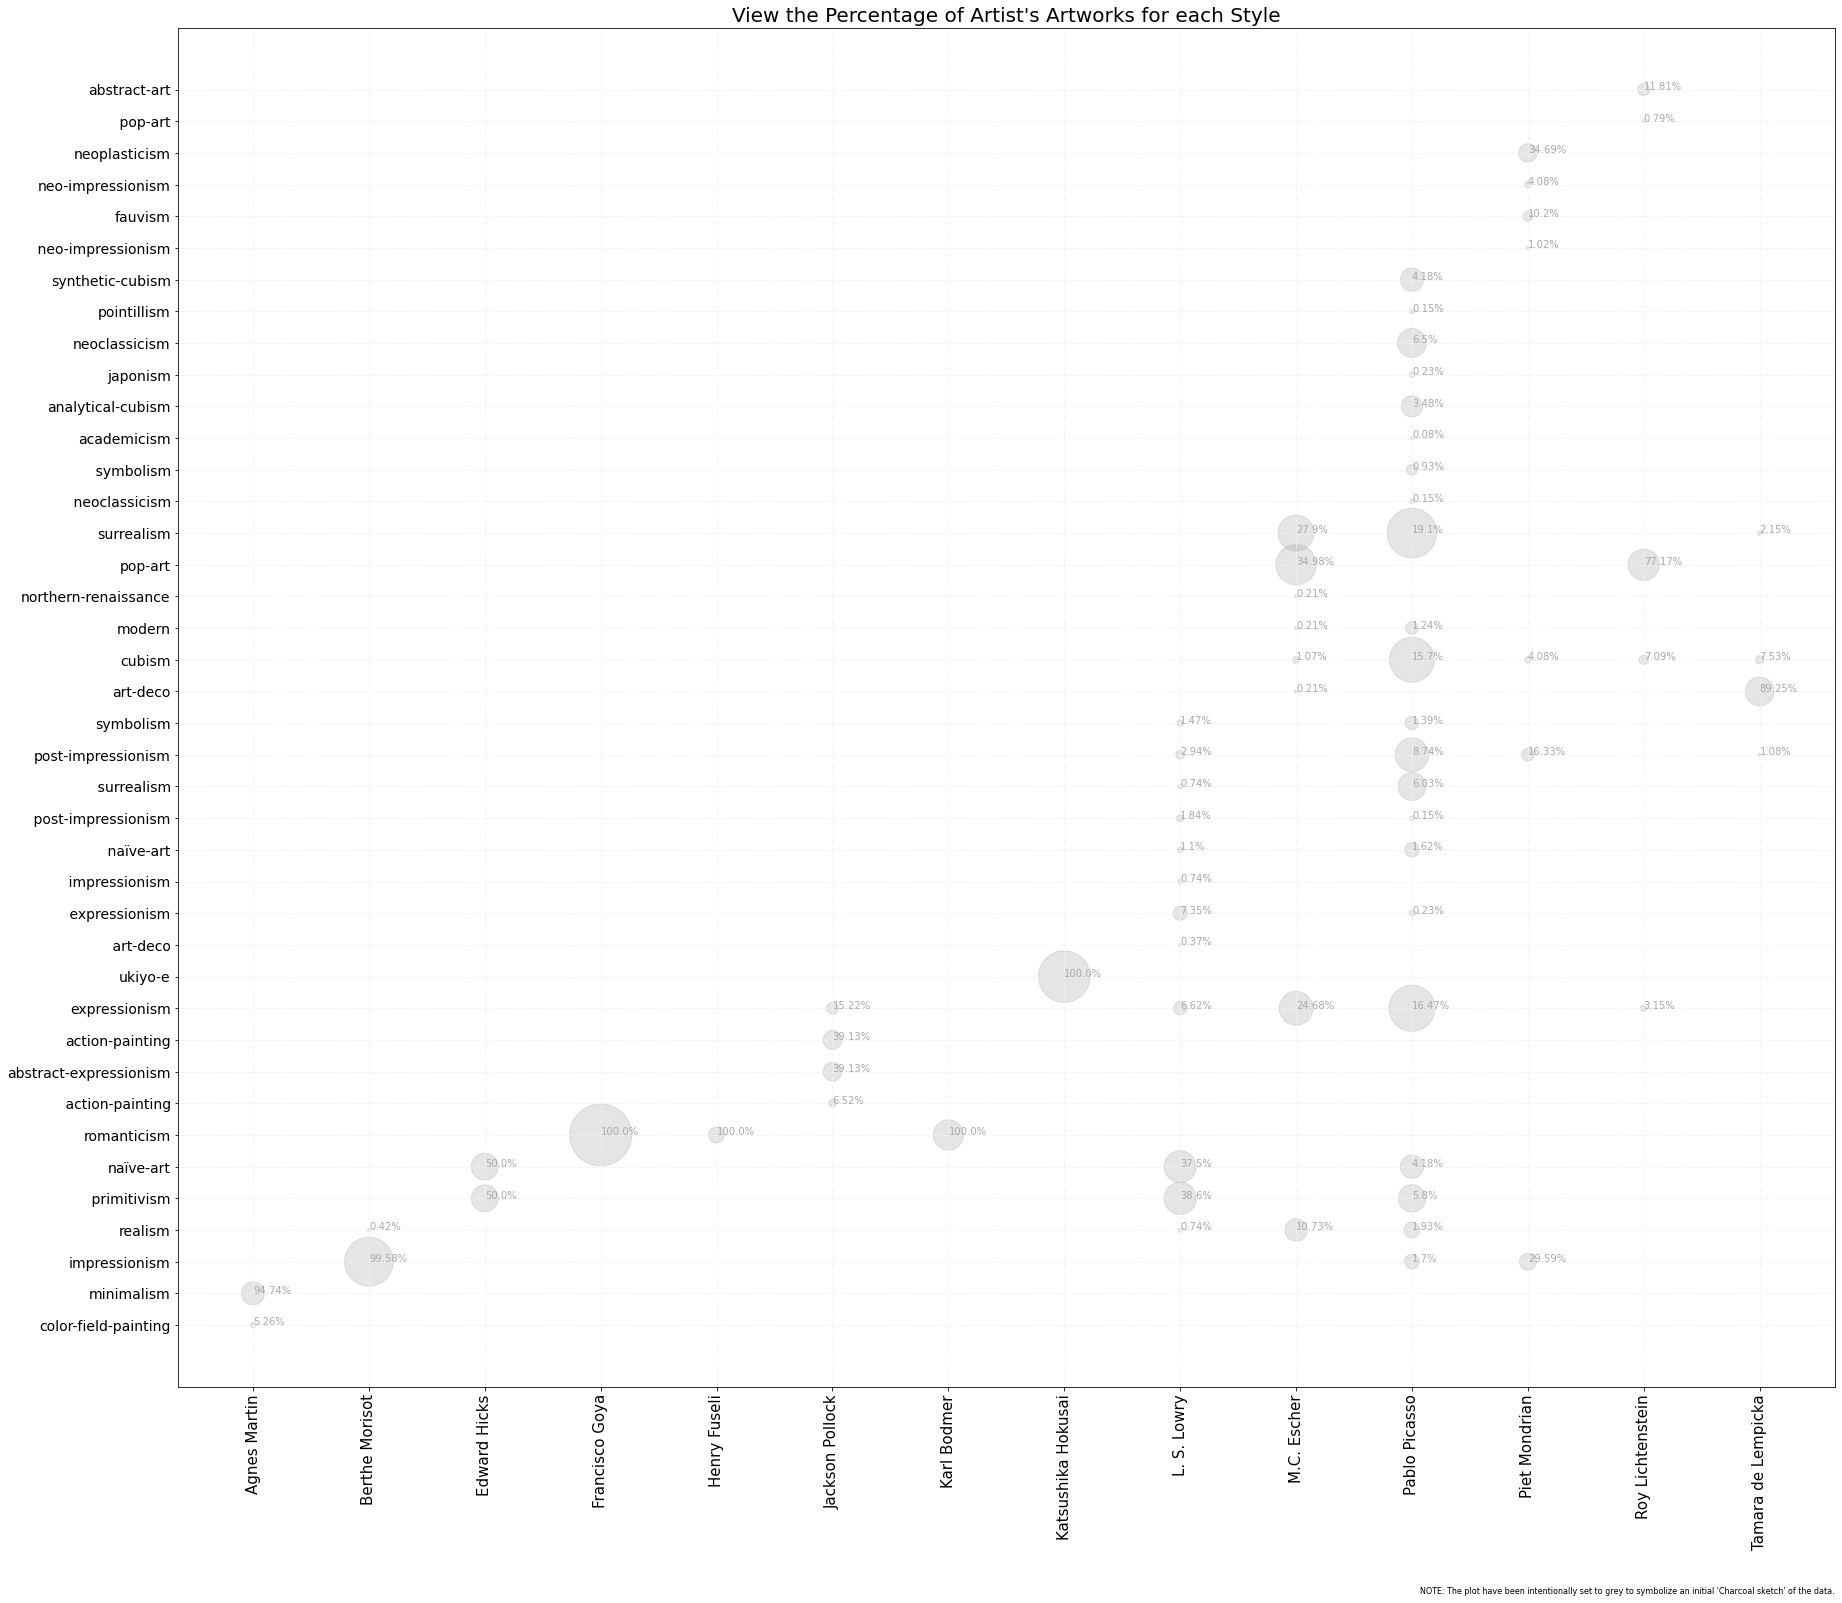

In [17]:
# create the figure
plt.figure(figsize  = (29.7,25))
ax = plt.axes()
ax.grid(True, linestyle = '-.' ,color = 'linen')

# create the scatter plot
plt.scatter(artist_style["artist"], artist_style["style"], s = artist_style["count"] * 10, alpha = 0.3, c = "darkgrey")

plt.yticks(fontsize = 14)
plt.xticks(rotation = 90, fontsize = 15)
plt.title("View the Percentage of Artist's Artworks for each Style", fontsize = 20)

# call that labelling function           
plot_label(artist_style["artist"], artist_style["style"], artist_style["percentage"], ax)

# add small note to bottom of the plot
plt.figtext(0.9, 0.01, "NOTE: The plot have been intentionally set to grey to symbolize an initial 'Charcoal sketch' of the data.", wrap=True, horizontalalignment='right', fontsize=8)

# show the plot
plt.show()

__NOTE:__ From the plot above we are able to build a profile of the Styles of each Artists body of work. 